# 4.- Train

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Load your dataset
df = pd.read_csv("../data/processed/features.csv").drop(['Date'], axis=1)
df

,Abs Extrema Duration,Low Threshold Count,Max Between Min,Pattern Extrema Duration,Min Deviation,Min Mean,Label
0,0.700000,0.033333,False,0.100000,0.383745,0.262343,0.0
1,0.366667,0.033333,False,0.200000,0.483459,0.382396,0.0
2,0.700000,0.066667,True,0.066667,0.012333,0.008721,1.0
3,0.466667,0.066667,True,0.133333,0.385687,0.087807,0.0
4,0.566667,0.000000,False,0.066667,0.083906,0.480007,0.0
...,...,...,...,...,...,...,...
98,0.466667,0.066667,True,0.100000,0.318943,0.047218,1.0
99,0.566667,0.033333,False,0.066667,0.338186,0.149486,1.0
100,0.733333,0.033333,False,0.133333,0.282234,0.105815,0.0
101,0.166667,0.100000,True,0.233333,0.272872,0.009114,1.0


In [3]:
label_df = df['Label']
features_df = df.drop('Label', axis=1)
features_df

,Abs Extrema Duration,Low Threshold Count,Max Between Min,Pattern Extrema Duration,Min Deviation,Min Mean
0,0.700000,0.033333,False,0.100000,0.383745,0.262343
1,0.366667,0.033333,False,0.200000,0.483459,0.382396
2,0.700000,0.066667,True,0.066667,0.012333,0.008721
3,0.466667,0.066667,True,0.133333,0.385687,0.087807
4,0.566667,0.000000,False,0.066667,0.083906,0.480007
...,...,...,...,...,...,...
98,0.466667,0.066667,True,0.100000,0.318943,0.047218
99,0.566667,0.033333,False,0.066667,0.338186,0.149486
100,0.733333,0.033333,False,0.133333,0.282234,0.105815
101,0.166667,0.100000,True,0.233333,0.272872,0.009114


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_df,
                                                    label_df,
                                                    test_size=0.3,
                                                    # random_state=42,
                                                    stratify=df['Label'])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for models
param_grid = [
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [5, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
    },
    {
        'model': [GradientBoostingClassifier()],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7],
    },
    {
        'model': [SVC()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
    }
]

# Initialize pipeline
pipeline = Pipeline([
    ('model', RandomForestClassifier())  # Placeholder model
])

# Iterate over cross-validation splits
cv_options = [3, 5, 7]
results = []

for cv_splits in cv_options:
    print(f"Running GridSearchCV with {cv_splits}-fold cross-validation")
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=cv_splits),  # Set the current CV splits
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Store results
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters (CV={cv_splits}):", best_params)
    print(f"Best Cross-Validation Score (CV={cv_splits}):", best_score)
    
    results.append({
        'cv_splits': cv_splits,
        'best_params': best_params,
        'best_score': best_score
    })

# Evaluate the best model on the test set
best_result = max(results, key=lambda x: x['best_score'])
print("\nBest Overall Configuration Across CV Splits:")
print(best_result)

# Extract and evaluate the best model pipeline
grid_search.best_estimator_.fit(X_train, y_train)

best_model = grid_search.best_estimator_.named_steps['model']


Running GridSearchCV with 3-fold cross-validation
Fitting 3 folds for each of 105 candidates, totalling 315 fits
Best Parameters (CV=3): {'model': RandomForestClassifier(), 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best Cross-Validation Score (CV=3): 0.7777777777777778
Running GridSearchCV with 5-fold cross-validation
Fitting 5 folds for each of 105 candidates, totalling 525 fits
Best Parameters (CV=5): {'model': RandomForestClassifier(), 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best Cross-Validation Score (CV=5): 0.7780952380952381
Running GridSearchCV with 7-fold cross-validation
Fitting 7 folds for each of 105 candidates, totalling 735 fits
Best Parameters (CV=7): {'model': RandomForestClassifier(), 'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best Cross-Validation Score (CV=7

In [ ]:
import pandas as pd

param_grid = [
    # {
    #     'model': [RandomForestClassifier()],
    #     'model__n_estimators': [100, 200, 500],
    #     'model__max_depth': [5, 10, 20],
    #     'model__min_samples_split': [2, 5, 10],
    #     'model__min_samples_leaf': [1, 2, 4],
    # },
    {
        'model': [GradientBoostingClassifier()],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 5, 7],
    },
    {
        'model': [SVC()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
    }
]


pipeline = Pipeline([
    ('model', RandomForestClassifier())
])


cv_options = [3]
all_results = []
summary_results = []

for cv_splits in cv_options:
    print(f"\n GridSearchCV with cross validation {cv_splits} splits")
    
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=cv_splits),
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    cv_results_df = pd.DataFrame(grid_search.cv_results_)
    cv_results_df['cv_splits'] = cv_splits
    all_results.append(cv_results_df)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters (CV={cv_splits}): {best_params}")
    print(f"Best score cross validation (CV={cv_splits}): {best_score}")
    
    summary_results.append({
        'cv_splits': cv_splits,
        'best_params': best_params,
        'best_score': best_score
    })

all_results_df = pd.concat(all_results, ignore_index=True)

summary_results_df = pd.DataFrame(summary_results)

print("\nSummary best results:")
print(summary_results_df)

best_overall_result = summary_results_df.loc[summary_results_df['best_score'].idxmax()]
print("\nBest parameters configuration:")
print(best_overall_result)

best_params = best_overall_result['best_params']
best_model_pipeline = Pipeline([
    ('model', best_params['model'].set_params(**{k.split('__')[1]: v for k, v in best_params.items() if k.startswith('model__')}))
])

best_model_pipeline.fit(X_train, y_train)

test_score = best_model_pipeline.score(X_test, y_test)
print("\nScoring in test with best model:", test_score)



Ejecutando GridSearchCV con validación cruzada de 3 divisiones
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters (CV=3): {'model': SVC(), 'model__C': 0.1, 'model__kernel': 'linear'}
Best score cross validation (CV=3): 0.7083333333333334

Summary best results:
   cv_splits                                        best_params  best_score
0          3  {'model': SVC(), 'model__C': 0.1, 'model__kern...    0.708333

Best parameters configuration:
cv_splits                                                      3
best_params    {'model': SVC(), 'model__C': 0.1, 'model__kern...
best_score                                              0.708333
Name: 0, dtype: object

Scoring in test with best model: 0.8387096774193549


c:\Users\walte\anaconda3\envs\double-bottom-detection-ml\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy on test set: 0.8387

Classification Report:
               precision    recall  f1-score   support

   No Pattern       0.92      0.75      0.83        16
Double Bottom       0.78      0.93      0.85        15

     accuracy                           0.84        31
    macro avg       0.85      0.84      0.84        31
 weighted avg       0.85      0.84      0.84        31



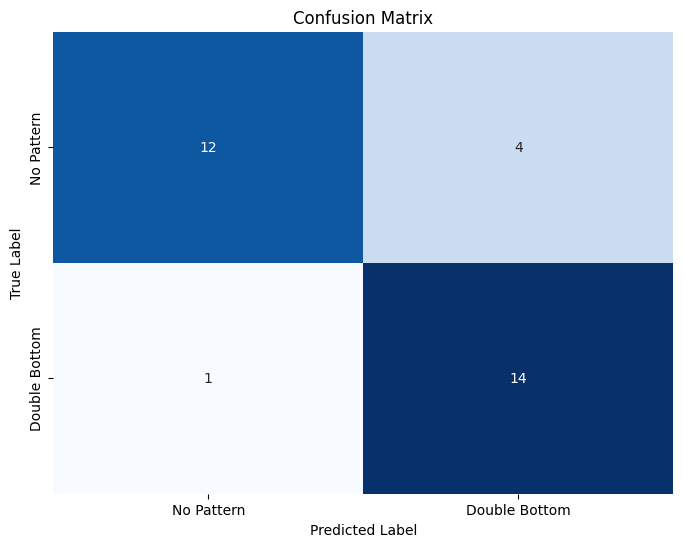

In [21]:
# Predict on the test set
# X_test_scaled = best_scaler.transform(X_test)
y_pred = best_model_pipeline.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['No Pattern', 'Double Bottom'])
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Pattern', 'Double Bottom'], yticklabels=['No Pattern', 'Double Bottom'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

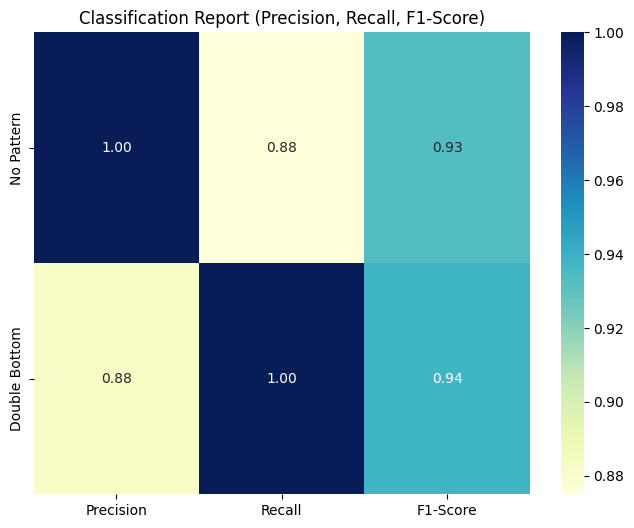

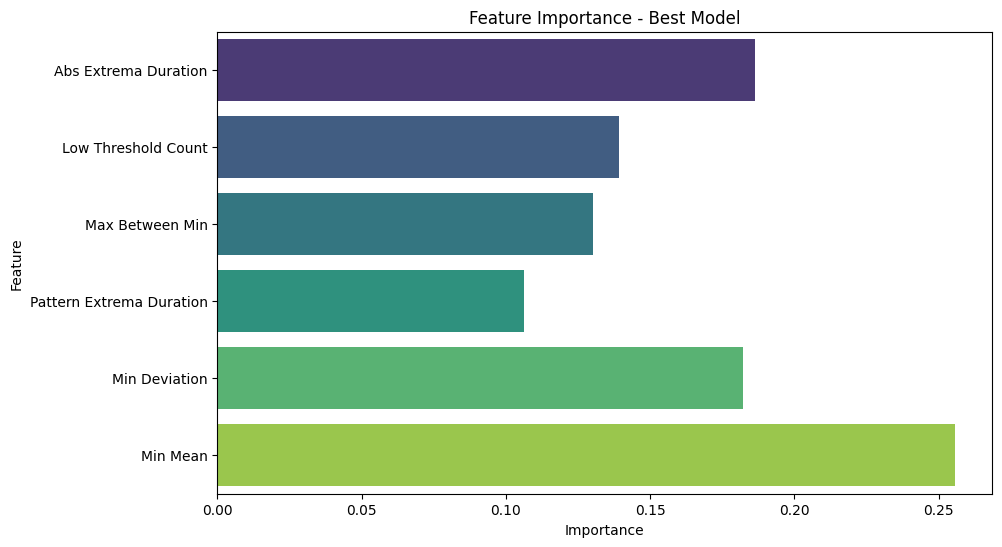

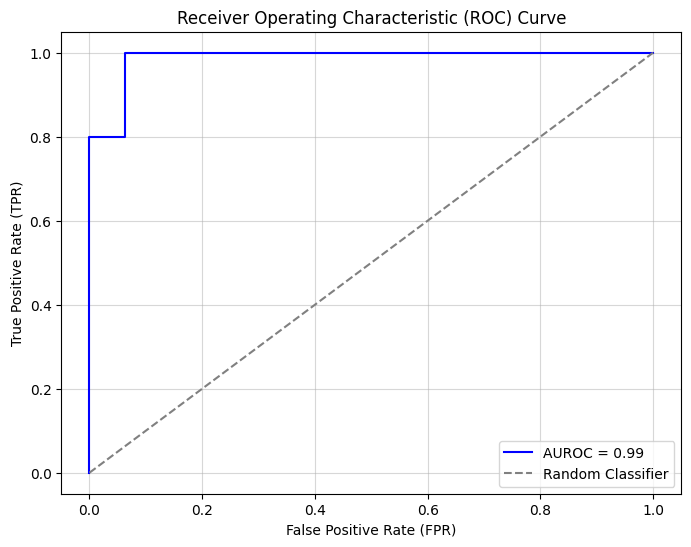

AUROC Score: 0.99


In [16]:
# Compute precision, recall, and f1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Create a DataFrame for heatmap
report_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=['No Pattern', 'Double Bottom'])

# Plot classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", cbar=True, fmt='.2f')
plt.title("Classification Report (Precision, Recall, F1-Score)")
plt.show()

# Check if the best model supports feature importance
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    features = features_df.columns  # Ensure X_train is a DataFrame
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    # sns.barplot(x=feature_importances, y=features, palette='viridis')
    sns.barplot(x=feature_importances, y=features, palette='viridis', hue=features, legend=False)
    plt.title("Feature Importance - Best Model")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()
else:
    print("The best model does not provide feature importances.")

# Compute probabilities or decision function scores for AUROC
if hasattr(best_model, "predict_proba"):
    # For models supporting predict_proba
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
elif hasattr(best_model, "decision_function"):
    # For models like SVC without predict_proba
    y_pred_proba = best_model.decision_function(X_test)
else:
    raise AttributeError("The selected model does not support probability or decision function.")

# Compute ROC curve and AUROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the AUROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUROC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()

print(f"AUROC Score: {auc_score:.2f}")
